Enter city name:  delhi



Weather Data:
Temperature (°C): 35.05
Humidity (%): 41
Wind Speed (m/s): 1.03


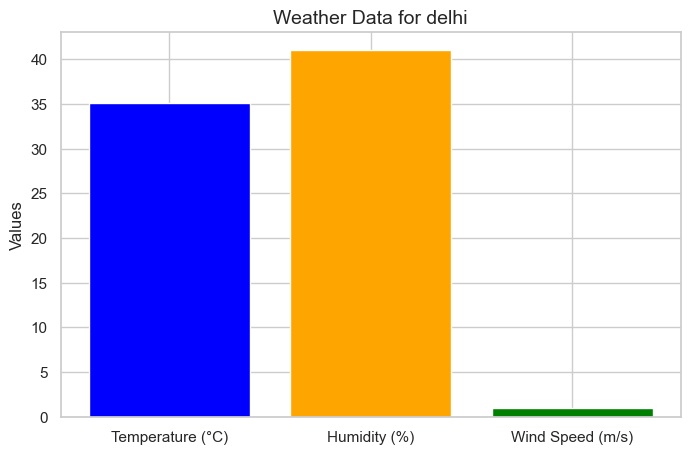

In [3]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns

def get_weather_data(city):
    API_KEY = "c5b75be08b7631af05b03478a7be5c47"  # actual API key of openweathermap.org
    URL = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"

    response = requests.get(URL)

    if response.status_code == 200:
        data = response.json()
        weather_info = {
            "Temperature (°C)": data["main"]["temp"],
            "Humidity (%)": data["main"]["humidity"],
            "Wind Speed (m/s)": data["wind"]["speed"]
        }
        return weather_info
    else:
        print("Error: City not found or API request failed.")
        return None

def visualize_weather(weather_info, city):
    if weather_info:
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 5))
        plt.bar(weather_info.keys(), weather_info.values(), color=['blue', 'orange', 'green'])
        plt.title(f"Weather Data for {city}", fontsize=14)
        plt.ylabel("Values")
        plt.show()
    else:
        print("Visualization cannot be generated due to missing data.")

if __name__ == "__main__":
    city = input("Enter city name: ")
    weather_data = get_weather_data(city)

    if weather_data:
        print("\nWeather Data:")
        for key, value in weather_data.items():
            print(f"{key}: {value}")

        visualize_weather(weather_data, city)